In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
the_path = '/content/gdrive/My Drive/master_thesis/predictions/'
! ls gdrive/My\ Drive/master_thesis/predictions

In [0]:
import numpy as np
import pandas as pd
import re
import random
import json
import collections
import pickle
import os
import importlib
import matplotlib

In [0]:
with open("/content/gdrive/My Drive/master_thesis/extended_relation_descriptions.json", 'r') as file:
    relation_descriptions = json.load(file)

In [0]:
def readin_result(model):
  result5 = pd.Series([])
  result10 = pd.Series([])
  result15 = pd.Series([])
  
  for i in range(10):
    the5 = pd.read_csv(the_path + str(model) + '_' + str(i) + '_DeNum_5_predictions.csv', usecols = [1,2,3])
    the10 = pd.read_csv(the_path + str(model) + '_' + str(i) + '_DeNum_10_predictions.csv', usecols = [1,2,3])
    the15 = pd.read_csv(the_path + str(model) + '_' + str(i) + '_DeNum_15_predictions.csv', usecols = [1,2,3])
        
    if result5.empty:
      result5 = the5
    else:
      result5 = pd.concat([result5, the5], ignore_index=True)
      
    if result10.empty:
      result10 = the10
    else:
      result10 = pd.concat([result10, the10], ignore_index=True)
      
    if result15.empty:
      result15 = the15
    else:
      result15 = pd.concat([result15, the15], ignore_index=True)
  
  return result5, result10, result15

In [0]:
connect_5, connect_10, connect_15 = readin_result('connect') 
inference_5, inference_10, inference_15 = readin_result('inference')
pooling_5, pooling_10, pooling_15 = readin_result('pooling')
mlp_5, mlp_10, mlp_15 = readin_result('mlp')

# Accuracy Rate of Each relation

In [0]:
def correctness(df):
  correct_dict = {}
  wrong_dict = {}
  
  for index, row in df.iterrows():
    
    true_label = row['true_label']
    predict_label = row['predict_label']
    relation = row['relation']
    
    if true_label == predict_label:
      if relation in correct_dict:
        correct_dict[relation] += 1
      else:
        correct_dict[relation] = 1
    else:
      if relation in wrong_dict:
        wrong_dict[relation] += 1
      else:
        wrong_dict[relation] = 1
        
  correctness_dict = {}
  for k in relation_descriptions:
    if k not in correct_dict:
      correct_dict[k] = 0
    if k not in wrong_dict:
      wrong_dict[k] = 0
      
    if (correct_dict[k] + wrong_dict[k]) == 0:
      cor = 0
    else:
      cor = correct_dict[k] / (correct_dict[k] + wrong_dict[k])
    
    correctness_dict[k] = cor
    
  return correctness_dict

In [0]:
# connect
correct_connect_5 = correctness(connect_5)
correct_connect_5_list = sorted([correct_connect_5[r] for r in correct_connect_5])

correct_connect_10 = correctness(connect_10)
correct_connect_10_list = sorted([correct_connect_10[r] for r in correct_connect_10])

correct_connect_15 = correctness(connect_15)
correct_connect_15_list = sorted([correct_connect_15[r] for r in correct_connect_15])

# inference
correct_inference_5 = correctness(inference_5)
correct_inference_5_list = sorted([correct_inference_5[r] for r in correct_inference_5])

correct_inference_10 = correctness(inference_10)
correct_inference_10_list = sorted([correct_inference_10[r] for r in correct_inference_10])

correct_inference_15 = correctness(inference_15)
correct_inference_15_list = sorted([correct_inference_15[r] for r in correct_inference_15])

# mlp
correct_mlp_5 = correctness(mlp_5)
correct_mlp_5_list = sorted([correct_mlp_5[r] for r in correct_mlp_5])

correct_mlp_10 = correctness(mlp_10)
correct_mlp_10_list = sorted([correct_mlp_10[r] for r in correct_mlp_10])

correct_mlp_15 = correctness(mlp_15)
correct_mlp_15_list = sorted([correct_mlp_15[r] for r in correct_mlp_15])


# pooling
correct_pooling_5 = correctness(pooling_5)
correct_pooling_5_list = sorted([correct_pooling_5[r] for r in correct_pooling_5])

correct_pooling_10 = correctness(pooling_10)
correct_pooling_10_list = sorted([correct_pooling_10[r] for r in correct_pooling_10])

correct_pooling_15 = correctness(pooling_15)
correct_pooling_15_list = sorted([correct_pooling_15[r] for r in correct_pooling_15])

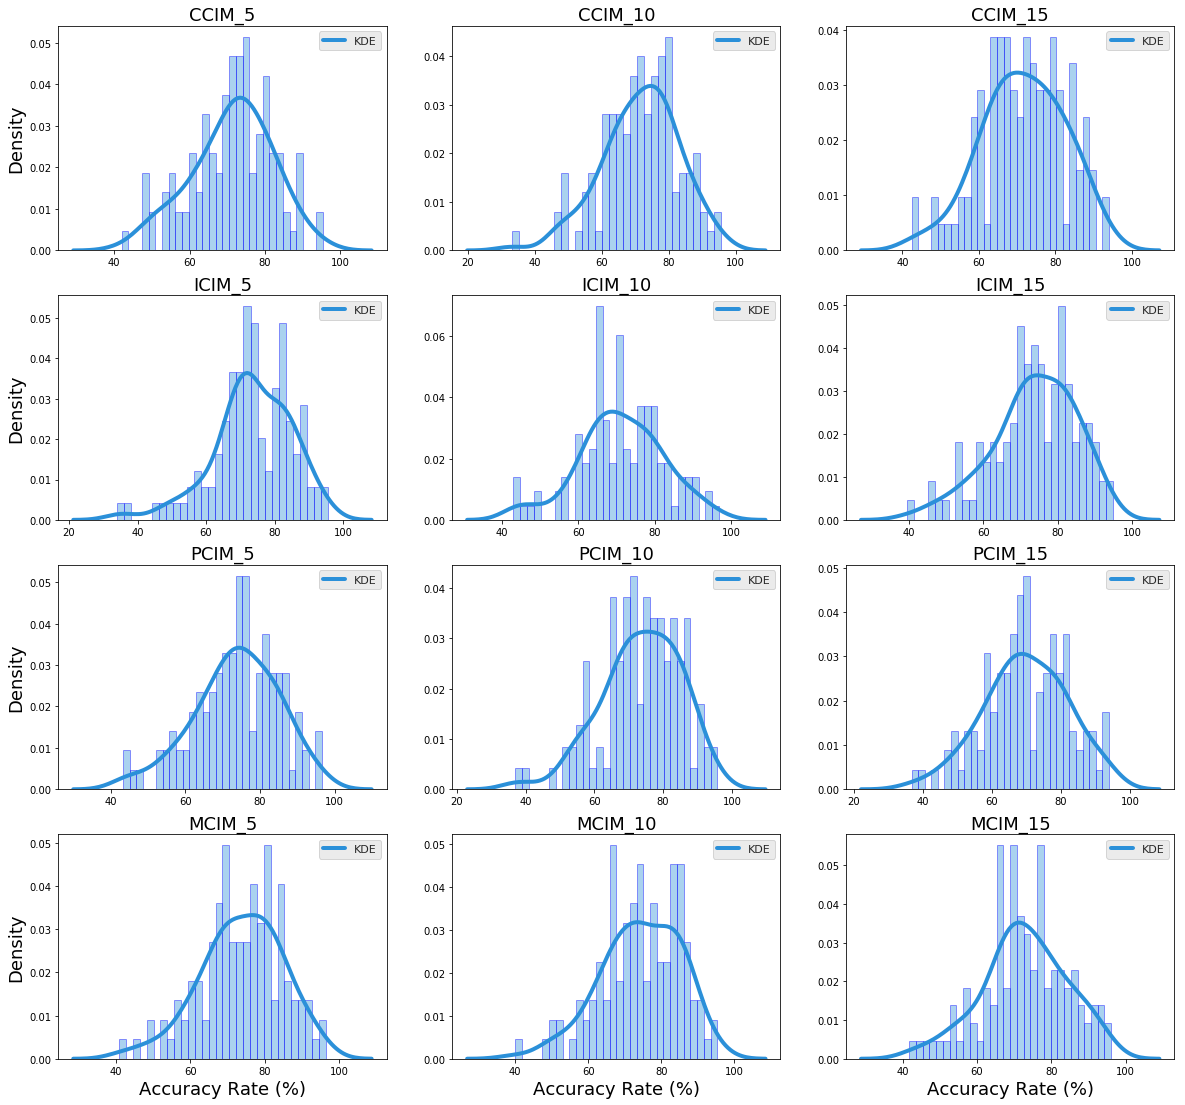

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(4, 3, figsize=(20,19))
sns.set()

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
axs[0, 0].set_title('CCIM_5', fontsize=18)
# axs[0, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
axs[0, 0].set_ylabel('Density', fontsize=18)

axs[1, 0].set_title('ICIM_5', fontsize=18)
# axs[1, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
axs[1, 0].set_ylabel('Density', fontsize=18)

axs[2, 0].set_title('PCIM_5', fontsize=18)
# axs[2, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
axs[2, 0].set_ylabel('Density', fontsize=18)

axs[3, 0].set_title('MCIM_5', fontsize=18)
axs[3, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
axs[3, 0].set_ylabel('Density', fontsize=18)

axs[0, 1].set_title('CCIM_10', fontsize=18)
# axs[0, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[0, 1].set_ylabel('Frequency', fontsize=18)

axs[1, 1].set_title('ICIM_10', fontsize=18)
# axs[1, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[1, 1].set_ylabel('Frequency', fontsize=18)

axs[2, 1].set_title('PCIM_10', fontsize=18)
# axs[2, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[2, 1].set_ylabel('Frequency', fontsize=18)

axs[3, 1].set_title('MCIM_10', fontsize=18)
axs[3, 1].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[3, 1].set_ylabel('Frequency', fontsize=18)

axs[0, 2].set_title('CCIM_15', fontsize=18)
# axs[0, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[0, 1].set_ylabel('Frequency', fontsize=18)

axs[1, 2].set_title('ICIM_15', fontsize=18)
# axs[1, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[1, 1].set_ylabel('Frequency', fontsize=18)

axs[2, 2].set_title('PCIM_15', fontsize=18)
# axs[2, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[2, 1].set_ylabel('Frequency', fontsize=18)

axs[3, 2].set_title('MCIM_15', fontsize=18)
axs[3, 2].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[3, 1].set_ylabel('Frequency', fontsize=18)

sns.distplot([c * 100 for c in correct_connect_5_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[0, 0])
sns.distplot([c * 100 for c in correct_inference_5_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[1, 0])
sns.distplot([c * 100 for c in correct_pooling_5_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[2, 0])
sns.distplot([c * 100 for c in correct_mlp_5_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[3, 0])


sns.distplot([c * 100 for c in correct_connect_10_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[0, 1])
sns.distplot([c * 100 for c in correct_inference_10_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[1, 1])
sns.distplot([c * 100 for c in correct_pooling_10_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[2, 1])
sns.distplot([c * 100 for c in correct_mlp_10_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[3, 1])


sns.distplot([c * 100 for c in correct_connect_15_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[0, 2])
sns.distplot([c * 100 for c in correct_inference_15_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[1, 2])
sns.distplot([c * 100 for c in correct_pooling_15_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[2, 2])
sns.distplot([c * 100 for c in correct_mlp_15_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[3, 2])

matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('xtick', labelsize=15)

# ANOVA

In [0]:
correct_connect_5_df = pd.DataFrame({'Model': ['CCIM'] * len(correct_connect_5_list), 'Description Number': [5] * len(correct_connect_5_list), 'Accuracy' : [correct_connect_5[r] for r in correct_connect_5], 'Relation': list(correct_connect_5.keys())})
correct_connect_10_df = pd.DataFrame({'Model': ['CCIM'] * len(correct_connect_10_list), 'Description Number': [10] * len(correct_connect_10_list), 'Accuracy' : [correct_connect_10[r] for r in correct_connect_10], 'Relation': list(correct_connect_10.keys())})
correct_connect_15_df = pd.DataFrame({'Model': ['CCIM'] * len(correct_connect_15_list), 'Description Number': [15] * len(correct_connect_15_list), 'Accuracy' : [correct_connect_15[r] for r in correct_connect_15], 'Relation': list(correct_connect_15.keys())})

correct_inference_5_df = pd.DataFrame({'Model': ['ICIM'] * len(correct_inference_5_list), 'Description Number': [5] * len(correct_inference_5_list), 'Accuracy' : [correct_inference_5[r] for r in correct_inference_5], 'Relation': list(correct_inference_5.keys())})
correct_inference_10_df = pd.DataFrame({'Model': ['ICIM'] * len(correct_inference_10_list), 'Description Number': [10] * len(correct_inference_10_list), 'Accuracy' : [correct_inference_10[r] for r in correct_inference_10], 'Relation': list(correct_inference_10.keys())})
correct_inference_15_df = pd.DataFrame({'Model': ['ICIM'] * len(correct_inference_15_list), 'Description Number': [15] * len(correct_inference_15_list), 'Accuracy' : [correct_inference_15[r] for r in correct_inference_15], 'Relation': list(correct_inference_15.keys())})

correct_pooling_5_df = pd.DataFrame({'Model': ['PCIM'] * len(correct_pooling_5_list), 'Description Number': [5] * len(correct_pooling_5_list), 'Accuracy' : [correct_pooling_5[r] for r in correct_pooling_5], 'Relation': list(correct_pooling_5.keys())})
correct_pooling_10_df = pd.DataFrame({'Model': ['PCIM'] * len(correct_pooling_10_list), 'Description Number': [10] * len(correct_pooling_10_list), 'Accuracy' : [correct_pooling_10[r] for r in correct_pooling_10], 'Relation': list(correct_pooling_10.keys())})
correct_pooling_15_df = pd.DataFrame({'Model': ['PCIM'] * len(correct_pooling_15_list), 'Description Number': [15] * len(correct_pooling_15_list), 'Accuracy' : [correct_pooling_15[r] for r in correct_pooling_15], 'Relation': list(correct_pooling_15.keys())})

correct_mlp_5_df = pd.DataFrame({'Model': ['MCIM'] * len(correct_mlp_5_list), 'Description Number': [5] * len(correct_mlp_5_list), 'Accuracy' : [correct_mlp_5[r] for r in correct_mlp_5], 'Relation': list(correct_mlp_5.keys())})
correct_mlp_10_df = pd.DataFrame({'Model': ['MCIM'] * len(correct_mlp_10_list), 'Description Number': [10] * len(correct_mlp_10_list), 'Accuracy' : [correct_mlp_10[r] for r in correct_mlp_10], 'Relation': list(correct_mlp_10.keys())})
correct_mlp_15_df = pd.DataFrame({'Model': ['MCIM'] * len(correct_mlp_15_list), 'Description Number': [15] * len(correct_mlp_15_list), 'Accuracy' : [correct_mlp_15[r] for r in correct_mlp_15], 'Relation': list(correct_mlp_15.keys())})




In [0]:
total_df = pd.concat([correct_connect_5_df, correct_connect_10_df, correct_connect_15_df, correct_inference_5_df, correct_inference_10_df, correct_inference_15_df, 
           correct_pooling_5_df, correct_pooling_10_df, correct_pooling_15_df, correct_mlp_5_df, correct_mlp_10_df, correct_mlp_15_df], ignore_index=True)

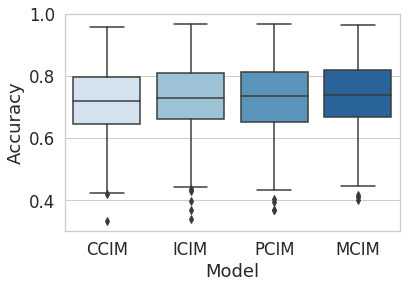

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.5)
ax = sns.boxplot(x="Model", y="Accuracy", data=total_df, palette="Blues")

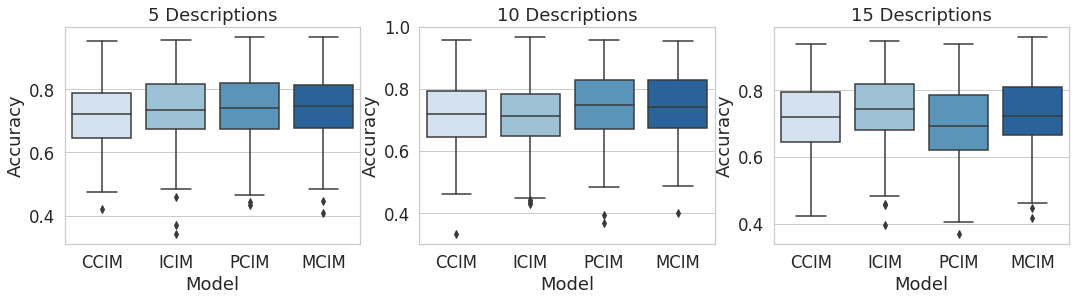

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(18,4))
axs[0].set_title('5 Descriptions', fontsize=18)
axs[1].set_title('10 Descriptions', fontsize=18)
axs[2].set_title('15 Descriptions', fontsize=18)
sns.boxplot(x="Model", y="Accuracy", data=total_df[total_df['Description Number'] == 5], palette="Blues", ax=axs[0])
sns.boxplot(x="Model", y="Accuracy", data=total_df[total_df['Description Number'] == 10], palette="Blues", ax=axs[1])
sns.boxplot(x="Model", y="Accuracy", data=total_df[total_df['Description Number'] == 15], palette="Blues", ax=axs[2])

In [14]:
import scipy.stats as stats
# 总的

stats.f_oneway(total_df[total_df['Model'] == 'CCIM']['Accuracy'], total_df[total_df['Model'] == 'ICIM']['Accuracy'], total_df[total_df['Model'] == 'PCIM']['Accuracy'], total_df[total_df['Model'] == 'MCIM']['Accuracy'])

F_onewayResult(statistic=2.29543996987835, pvalue=0.0760829673785682)

In [15]:
stats.f_oneway(total_df[total_df['Model'] == 'CCIM'][total_df['Description Number'] == 5]['Accuracy'], total_df[total_df['Model'] == 'ICIM'][total_df['Description Number'] == 5]['Accuracy'], 
               total_df[total_df['Model'] == 'PCIM'][total_df['Description Number'] == 5]['Accuracy'], total_df[total_df['Model'] == 'MCIM'][total_df['Description Number'] == 5]['Accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


F_onewayResult(statistic=1.523222761044888, pvalue=0.2076425196435076)

In [16]:
stats.f_oneway(total_df[total_df['Model'] == 'CCIM'][total_df['Description Number'] == 10]['Accuracy'], total_df[total_df['Model'] == 'ICIM'][total_df['Description Number'] == 10]['Accuracy'], 
               total_df[total_df['Model'] == 'PCIM'][total_df['Description Number'] == 10]['Accuracy'], total_df[total_df['Model'] == 'MCIM'][total_df['Description Number'] == 10]['Accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


F_onewayResult(statistic=2.2391326260571693, pvalue=0.0829215829050936)

In [17]:
stats.f_oneway(total_df[total_df['Model'] == 'CCIM'][total_df['Description Number'] == 15]['Accuracy'], total_df[total_df['Model'] == 'ICIM'][total_df['Description Number'] == 15]['Accuracy'], 
               total_df[total_df['Model'] == 'PCIM'][total_df['Description Number'] == 15]['Accuracy'], total_df[total_df['Model'] == 'MCIM'][total_df['Description Number'] == 15]['Accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


F_onewayResult(statistic=2.683348660984258, pvalue=0.04619601309907037)

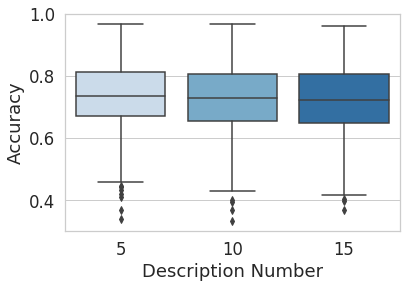

In [18]:
ax = sns.boxplot(x="Description Number", y="Accuracy", data=total_df, palette="Blues")

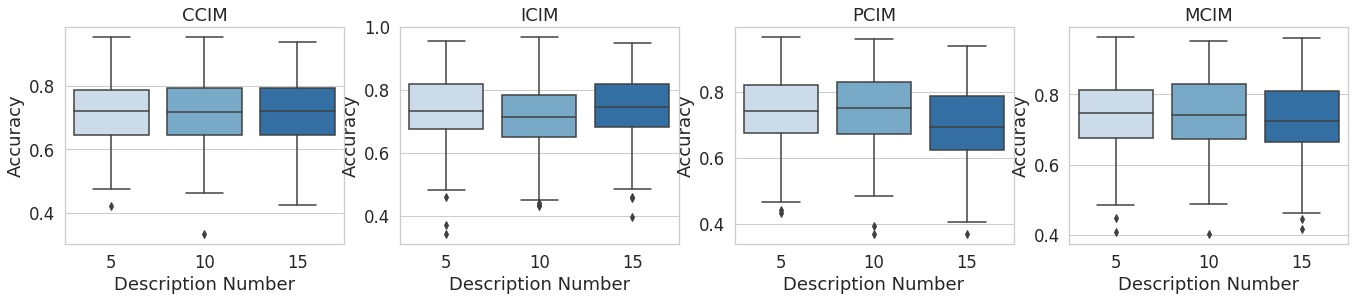

In [19]:
fig, axs = plt.subplots(1, 4, figsize=(23,4))
axs[0].set_title('CCIM', fontsize=18)
axs[1].set_title('ICIM', fontsize=18)
axs[2].set_title('PCIM', fontsize=18)
axs[3].set_title('MCIM', fontsize=18)
sns.boxplot(x="Description Number", y="Accuracy", data=total_df[total_df['Model'] == 'CCIM'], palette="Blues", ax=axs[0])
sns.boxplot(x="Description Number", y="Accuracy", data=total_df[total_df['Model'] == 'ICIM'], palette="Blues", ax=axs[1])
sns.boxplot(x="Description Number", y="Accuracy", data=total_df[total_df['Model'] == 'PCIM'], palette="Blues", ax=axs[2])
sns.boxplot(x="Description Number", y="Accuracy", data=total_df[total_df['Model'] == 'MCIM'], palette="Blues", ax=axs[3])

In [20]:
import scipy.stats as stats

stats.f_oneway(total_df[total_df['Description Number'] == 5]['Accuracy'], total_df[total_df['Description Number'] == 10]['Accuracy'], total_df[total_df['Description Number'] == 15]['Accuracy'])

F_onewayResult(statistic=1.158203173709256, pvalue=0.31434295394213413)

In [21]:
stats.f_oneway(total_df[total_df['Description Number'] == 5][total_df['Model'] == 'CCIM']['Accuracy'], total_df[total_df['Description Number'] == 10][total_df['Model'] == 'CCIM']['Accuracy'], 
               total_df[total_df['Description Number'] == 15][total_df['Model'] == 'CCIM']['Accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


F_onewayResult(statistic=0.06062033690903519, pvalue=0.9411901894699437)

In [22]:
stats.f_oneway(total_df[total_df['Description Number'] == 5][total_df['Model'] == 'ICIM']['Accuracy'], total_df[total_df['Description Number'] == 10][total_df['Model'] == 'ICIM']['Accuracy'], 
               total_df[total_df['Description Number'] == 15][total_df['Model'] == 'ICIM']['Accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


F_onewayResult(statistic=1.9675554732044114, pvalue=0.14131121813199413)

In [23]:
stats.f_oneway(total_df[total_df['Description Number'] == 5][total_df['Model'] == 'PCIM']['Accuracy'], total_df[total_df['Description Number'] == 10][total_df['Model'] == 'PCIM']['Accuracy'], 
               total_df[total_df['Description Number'] == 15][total_df['Model'] == 'PCIM']['Accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


F_onewayResult(statistic=4.5365785237787835, pvalue=0.011334677455810141)

In [24]:
stats.f_oneway(total_df[total_df['Description Number'] == 5][total_df['Model'] == 'MCIM']['Accuracy'], total_df[total_df['Description Number'] == 10][total_df['Model'] == 'MCIM']['Accuracy'], 
               total_df[total_df['Description Number'] == 15][total_df['Model'] == 'MCIM']['Accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


F_onewayResult(statistic=0.57934632850198, pvalue=0.5607903316278677)

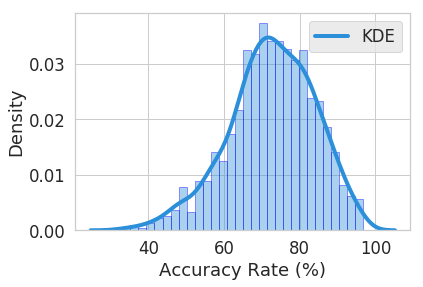

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 1)
# fig, ax = plt.subplots(1, 1, figsize=(20,19))
# sns.set()

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# ax.set_title('CCIM_5', fontsize=18)
ax.set_xlabel('Accuracy Rate (%)', fontsize=18)
ax.set_ylabel('Density', fontsize=18)


sns.distplot([c * 100 for c in total_df['Accuracy']], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=ax)


# matplotlib.rc('ytick', labelsize=15)
# matplotlib.rc('xtick', labelsize=15)

In [0]:
dict_list = [correct_connect_5, correct_connect_10, correct_connect_15, correct_inference_5, correct_inference_10, correct_inference_15, correct_mlp_5, correct_mlp_10, correct_mlp_15, correct_pooling_5, correct_pooling_10, correct_pooling_15]

In [0]:
total_dict = {r : 0 for r in relation_descriptions}

In [0]:
for d in dict_list:
  for d_k in d:
    total_dict[d_k] += d[d_k]

In [0]:
total_dict_mean = {a : total_dict[a]/len(dict_list) for a in total_dict}

In [0]:
relation_order = []
for elem in sorted(total_dict_mean.items(),  key=lambda x: x[1]) :
  relation_order.append(elem[0])

In [31]:
len(relation_order)

120

In [0]:
a = [total_df[total_df['Relation'] == a]['Accuracy'] for a in relation_descriptions]

In [33]:
stats.f_oneway(a[0], a[1], a[2])

F_onewayResult(statistic=100.30881039794056, pvalue=9.443601721953832e-15)

In [34]:
stats.f_oneway(*a)

F_onewayResult(statistic=67.28529830479143, pvalue=0.0)

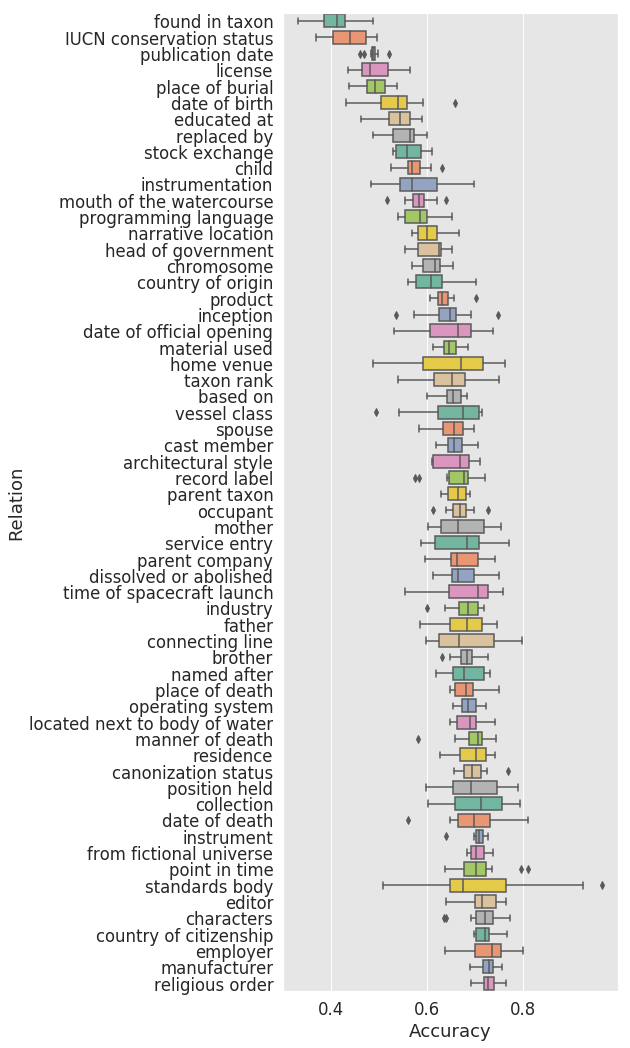

In [35]:
plt.figure(figsize=(6, 18))

ax = sns.boxplot(x="Accuracy", y="Relation", data=total_df, palette="Set2", order=relation_order[:60])

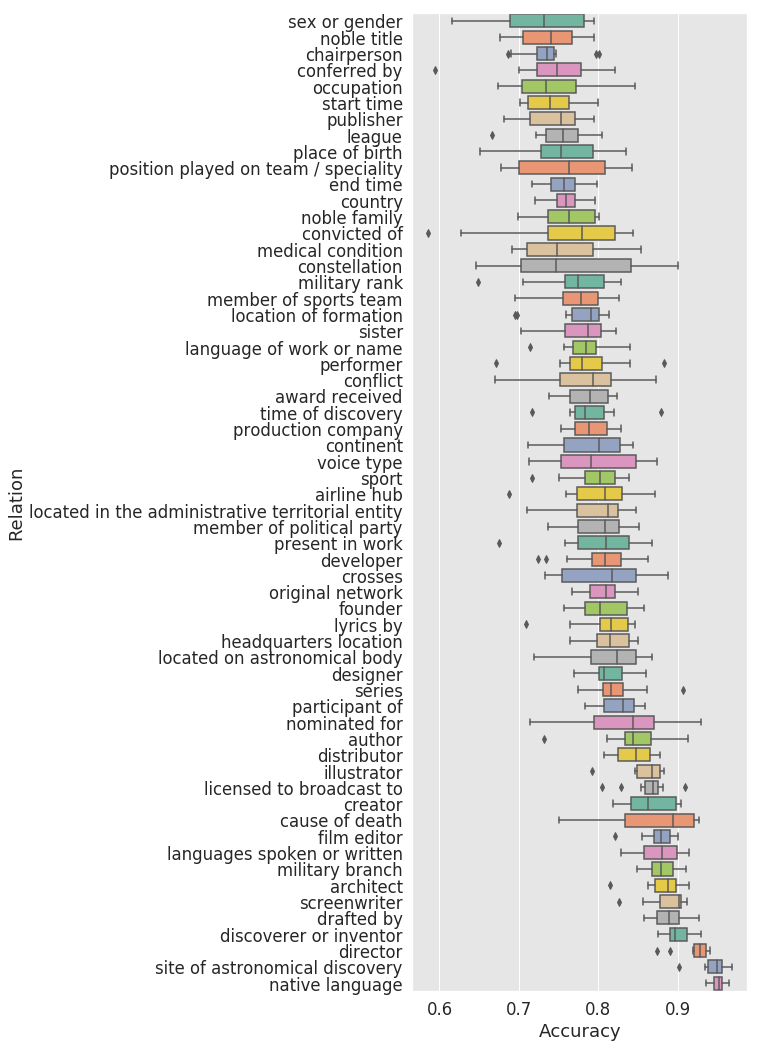

In [36]:
plt.figure(figsize=(6, 18))

ax = sns.boxplot(x="Accuracy", y="Relation", data=total_df, palette="Set2", order=relation_order[60:])

In [37]:
len(relation_descriptions['found in taxon']), len(relation_descriptions['IUCN conservation status']), \
len(relation_descriptions['publication date']), len(relation_descriptions['license']), len(relation_descriptions['place of burial'])

(50, 50, 50, 22, 50)

In [38]:
len(relation_descriptions['native language']), len(relation_descriptions['site of astronomical discovery']),\
len(relation_descriptions['director']), len(relation_descriptions['discoverer or inventor']), len(relation_descriptions['drafted by'])

(50, 50, 50, 50, 50)

In [39]:
relation_descriptions['publication date']

['The film SUBJECT_ENTITY was released in the year OBJECT_ENTITY\n',
 'SUBJECT_ENTITY was created in the year OBJECT_ENTITY\n',
 'SUBJECT_ENTITY was published in the year OBJECT_ENTITY\n',
 'SUBJECT_ENTITY was released in the year OBJECT_ENTITY\n',
 'The date of publication for SUBJECT_ENTITY was OBJECT_ENTITY\n',
 'The publication date of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'The publication year of SUBJECT_ENTITY was OBJECT_ENTITY\n',
 'The year that SUBJECT_ENTITY was made was OBJECT_ENTITY\n',
 'OBJECT_ENTITY is the publication date of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY is the publication year of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY is the year that SUBJECT_ENTITY was released\n',
 'OBJECT_ENTITY was the publication year of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY was the release year of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY was the year in which SUBJECT_ENTITY was made\n',
 'OBJECT_ENTITY was the year of publication for SUBJECT_ENTITY\n',
 'OBJECT_ENTITY was the year of SUBJECT_ENTITY\n',
 '

In [40]:
relation_descriptions['native language']

['The nationality of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'The nationality of SUBJECT_ENTITY was OBJECT_ENTITY\n',
 'The language of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'OBJECT_ENTITY is the national identity of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY is the native language of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY is the native tongue of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY nationality is SUBJECT_ENTITY\n',
 'The nationality of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'OBJECT_ENTITY was the nationality of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY was the native language of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY is the ethnic group that SUBJECT_ENTITY belongs\n',
 'OBJECT_ENTITY was the nationality of SUBJECT_ENTITY\n',
 'The different nationalities of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'The minority nationalities of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'The various nationalities of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'The nationals of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'The different nationalities of SUB

In [41]:
relation_length = {r : [0, 0] for r in relation_descriptions}

for i in range(10):
  current_train = '/content/gdrive/My Drive/master_thesis/data/uwre/train.' + str(i)
  current_dev = '/content/gdrive/My Drive/master_thesis/data/uwre/dev.' + str(i)
  current_test = '/content/gdrive/My Drive/master_thesis/data/uwre/test.' + str(i)
  
  for path in [current_train, current_dev, current_test]:
    print(path)
    with open(path) as f:
        for line in f:
            loaded_example = json.loads(line)
            relation = loaded_example["relation"]
            sentence = loaded_example["sentence"]
            the_len = len(sentence.split())
            
            relation_length[relation][0] += 1
            relation_length[relation][1] += the_len

/content/gdrive/My Drive/master_thesis/data/uwre/train.0
/content/gdrive/My Drive/master_thesis/data/uwre/dev.0
/content/gdrive/My Drive/master_thesis/data/uwre/test.0
/content/gdrive/My Drive/master_thesis/data/uwre/train.1
/content/gdrive/My Drive/master_thesis/data/uwre/dev.1
/content/gdrive/My Drive/master_thesis/data/uwre/test.1
/content/gdrive/My Drive/master_thesis/data/uwre/train.2
/content/gdrive/My Drive/master_thesis/data/uwre/dev.2
/content/gdrive/My Drive/master_thesis/data/uwre/test.2
/content/gdrive/My Drive/master_thesis/data/uwre/train.3
/content/gdrive/My Drive/master_thesis/data/uwre/dev.3
/content/gdrive/My Drive/master_thesis/data/uwre/test.3
/content/gdrive/My Drive/master_thesis/data/uwre/train.4
/content/gdrive/My Drive/master_thesis/data/uwre/dev.4
/content/gdrive/My Drive/master_thesis/data/uwre/test.4
/content/gdrive/My Drive/master_thesis/data/uwre/train.5
/content/gdrive/My Drive/master_thesis/data/uwre/dev.5
/content/gdrive/My Drive/master_thesis/data/uwre

In [42]:
relation_length['native language']

[71015, 1294378]

In [0]:
relation_avelen = {r : (relation_length[r][1] / relation_length[r][0]) for r in relation_length}

In [0]:
order_avelen = [relation_avelen[r] for r in relation_order]

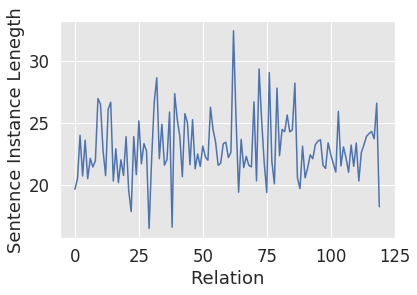

In [45]:
plt.plot(order_avelen)
plt.ylabel('Sentence Instance Lenegth')
plt.xlabel('Relation')
plt.show()

In [0]:
relation_order

In [0]:
import numpy as np
import re
import random
import json
import collections
import pickle
import os
import importlib

In [0]:
# train_mnli_path = the_path + "data/multinli_0.9/multinli_0.9_train.jsonl"
# dev_match_path = the_path + "data/multinli_0.9/multinli_0.9_dev_matched.jsonl"
# dev_mismatch_path = the_path + "data/multinli_0.9/multinli_0.9_dev_mismatched.jsonl"

train_uwre_path = "/content/gdrive/My Drive/master_thesis/data/uwre/train."
dev_uwre_path = "/content/gdrive/My Drive/master_thesis/data/uwre/dev."
test_uwre_path = "/content/gdrive/My Drive/master_thesis/data/uwre/test."

def load_uwre_data(path):
    """
    Load UWRE data.
    "uwre" is set to "genre". 
    """
    relation_dict = {}
    positive_relation = {}
    negative_relation = {}
    
    entail_dict = {}
    entail_list = []
    
    with open(path) as f:
        for line in f:
            loaded_example = json.loads(line)
            
            entail = loaded_example["gold_label"]
            relation = loaded_example["relation"]
            
            if relation not in relation_dict:
                relation_dict[relation] = 1
            else:
                relation_dict[relation] += 1
                
            if entail not in entail_dict:
                entail_dict[entail] = 1
            else:
                entail_dict[entail] += 1
                
            if entail == 'entailment':
              entail_list.append(0)
              if relation in positive_relation:
                positive_relation[relation] += 1
              else:
                positive_relation[relation] = 1
            
            elif entail == 'neutral':
              entail_list.append(1)
              if relation in negative_relation:
                negative_relation[relation] += 1
              else:
                negative_relation[relation] = 1
            else:
              print("illegal entail label:", entail)
    return relation_dict, entail_dict, entail_list, positive_relation, negative_relation


In [0]:
train_relation_dicts = []
train_entail_dicts = []
train_entail_list = []

dev_relation_dicts = []
dev_entail_dicts = []
dev_entail_list = []

test_relation_dicts = []
test_entail_dicts = []
test_entail_list = []

train_positive = []
train_negative = []
dev_positive = []
dev_negative = []
test_positive = []
test_negative = []

for i in range(10):
  current_train = train_uwre_path + str(i)
  current_dev = dev_uwre_path + str(i)
  current_test = test_uwre_path + str(i)
  
  train_relation, train_entail, train_ent, train_p, train_n = load_uwre_data(current_train)
  dev_relation, dev_entail, dev_ent, dev_p, dev_n = load_uwre_data(current_dev)
  test_relation, test_entail, test_ent, test_p, test_n = load_uwre_data(current_test)
  
  train_positive.append(train_p)
  train_negative.append(train_n)
  dev_positive.append(dev_p)
  dev_negative.append(dev_n)
  test_positive.append(test_p)
  test_negative.append(test_n)
  
  train_relation_dicts.append(train_relation)
  train_entail_dicts.append(train_entail)
  train_entail_list.extend(train_ent)
  
  dev_relation_dicts.append(dev_relation)
  dev_entail_dicts.append(dev_entail)
  dev_entail_list.extend(dev_ent)
  
  test_relation_dicts.append(test_relation)
  test_entail_dicts.append(test_entail)
  test_entail_list.extend(test_ent)

In [0]:
def cal_off(positive, negative):
  offset = {}

  for i in range(len(positive)):
    tp = positive[i]
    tn = negative[i]
    for counter, relation in enumerate(tp):
      if relation in offset:
        offset[relation].append((tn[relation] - tp[relation])/tn[relation])
      else:
        offset[relation] = [(tn[relation] - tp[relation])/tn[relation]]
     
  offset_ave = {}
  
  for r in offset.keys():
    offset_ave[r] = sum(offset[r])/len(offset[r])
    
  return offset_ave
        
train_off = cal_off(train_positive, train_negative)
dev_off = cal_off(dev_positive, dev_negative)
test_off = cal_off(test_positive, test_negative)

train_off_list = [train_off[r] for r in relation_order]

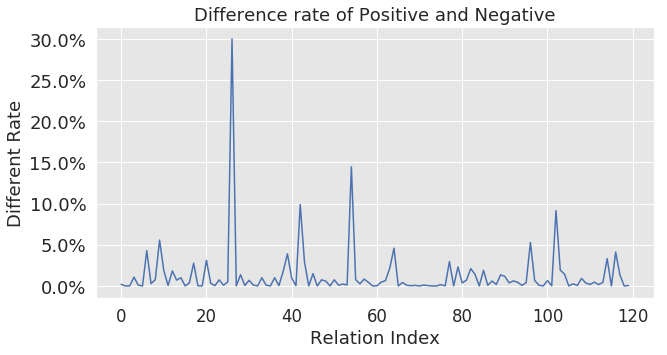

In [54]:
def ent_ave(pos_list, neg_list):
  ent = {}
  neu = {}
  for d_list in pos_list:
    for d in d_list:
      for k in d:
        if k in ent:
          ent[k] += d[k]
        else:
          ent[k] = d[k]
  for d_list in neg_list:
    for d in d_list:
      for k in d:
        if k in neu:
          neu[k] += d[k]
        else:
          neu[k] = d[k]
    
    off_dict = {k : (neu[k]-ent[k])/(neu[k]+ent[k]) for k in neu}
    
  return off_dict
    
# offset_dict = ent_ave([train_positive, dev_positive, test_positive], [train_negative, dev_negative, test_negative])
offset_dict = ent_ave([train_positive], [train_negative])

order_off = [offset_dict[r] for r in relation_order]

import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib

# plt.plot([100 * i for i in order_off])
fig, ax = plt.subplots(1, figsize=(10,5))
matplotlib.rc('ytick', labelsize=18)
ax.plot([100 * i for i in order_off])
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.set_title('Difference rate of Positive and Negative', fontsize=18)
ax.set_xlabel('Relation Index', fontsize=18)
ax.set_ylabel('Different Rate', fontsize=18)

plt.show()

In [0]:
balanced = []
unbalanced = []

for r in offset_dict:
  if offset_dict[r] < 0.03:
    balanced.append(r)
  else:
    unbalanced.append(r)

In [0]:
balanced_acc = [total_dict_mean[r] for r in balanced]
unbalanced_acc = [total_dict_mean[r] for r in unbalanced]

In [99]:
len(balanced_acc)

108

In [103]:
stats.f_oneway(balanced_acc, unbalanced_acc)

F_onewayResult(statistic=0.01585651797615109, pvalue=0.9000074395135693)

In [0]:
value = balanced_acc + unbalanced_acc
ind = ['balanced'] * len(balanced_acc) + ['unbalanced'] * len(unbalanced_acc)

In [0]:
bal_df = pd.DataFrame()
bal_df['Accuracy'] = value
bal_df['Balance Status'] = ind

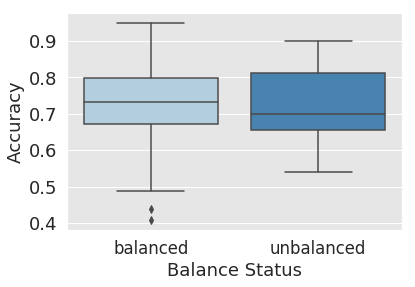

In [123]:
ax = sns.boxplot(x="Balance Status", y="Accuracy", data=bal_df, palette="Blues")